In [123]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [ ]:
#preprocessing qui aurait du etre fait avant :
#enlever les retours a la ligne
corpus.replace("\\n", " ", regex=True, inplace=True)

In [156]:
path = PureWindowsPath(os.getcwd() + "\\data\\input\\data.parquet")
path = path.as_posix()
corpus = pd.read_parquet(path) #engine="fastparquet"
corpus["category_bin"] = np.select([corpus["category"] == "philosophy"], [1], default=0)
corpus = corpus.sample(frac=1).reset_index(drop=True)
# corpus["category_bin"] = (corpus["category_bin"] == "philosophy")
corpus

,id,message,message_preprocessed,category,length,category_bin
0,3685,"Thomas d’Aquin fait un assez long développement sur la distinction entre\nl’opération d’un outil, qui reçoit son action d’un autre, et l’opération «\npropre » qui vient de la forme même de l’agent. Appliqué à notre question cela\nveut dire que nous avons deux modèles :",thomas aquin fait assez long développement distinction entre opération outil reçoit action autre opération « propre » vient forme agent appliqué question cela veut dire deux modèle,philosophy,266,1
1,3457,Y-a-t-il en Dieu une procession qu’on puisse appeler génération ? Oui.,y-a-t-il dieu procession puisse appeler génération oui,philosophy,70,1
2,1320,"Nous avons vu [quoi est Dieu](https://parlafoi.fr/2019/01/12/les-cinq-voies-\nde-thomas-daquin/), [comment est Dieu](https://parlafoi.fr/2019/01/19/la-\nsimplicite-de-dieu-selon-thomas-daquin/), [comment Dieu\nsait](https://parlafoi.fr/2019/04/13/lomniscience-de-dieu-thomas-daquin/),\n[comment Dieu veut](https://parlafoi.fr/2019/04/27/la-volonte-de-dieu-thomas-\ndaquin/)… nous nous rapprochons ainsi méthodiquement de ce qu’il _fait_ et de\nl’étude de la création. Mais avant cela, il manque une dernière chose :\ncomment Dieu _peut_ une chose. Voilà pourquoi dans la Question 25 de la\nPremière Partie de sa Summa Theologiae, Thomas d’Aquin parle de la Puissance\nde Dieu.",vu quoi dieuhttpsparlafoifrles-cinq-voies- de-thomas-daquin comment dieuhttpsparlafoifrla- simplicite-de-dieu-selon-thomas-daquin comment dieu saithttpsparlafoifrlomniscience-de-dieu-thomas-daquin comment dieu veuthttpsparlafoifrla-volonte-de-dieu-thomas- daquin… rapprochons ainsi méthodiquement fait étude création avant cela manque dernier chose comment dieu peut chose voilà pourquoi question première partie summa theologiae thomas aquin parle puissance dieu,philosophy,667,1
3,7224,"J’avais prévu dans cet article d’exposer encore la doctrine de Samuel Ward,\nEdward Polhill, A. Kuyper, H. Hoeksema et K. Schilder pour montrer en quoi les\ndébats internes aux réformés à ce sujet soulignent la continuité entre\nl’approche patristique et l’approche presbytérienne mais cela rallongerait\ninutilement l’article puisqu’il me paraît clair que nous avons montré que dire\nque les pères adhéraient massivement à la régénération baptismale, comprise\ncomme un changement de nature opéré par le baptême, relève d’une lecture\nsuperficielle des pères.",javais prévu cet article exposer encore doctrine samuel ward edward polhill a kuyper heure hoeksema k schilder montrer quoi débat interne réformé sujet soulignent continuité entre approche patristique approche presbytérien cela rallongerait inutilement article paraît clair montré dire père adhéraient massivement régénération baptismale comprise comme changement nature opéré baptême relève lecture superficielle père,baptism,553,0
4,6700,"J’ai décidé de [définir administration](https://parlafoi.fr/2018/12/19/que-\nveut-dire-administrer-lalliance-ou-administrer-la-promesse/) précisément pour\npouvoir répondre à cette question. J’ai dit plus tôt que c’est la promesse qui\nsert de base à l’administration du baptême à une personne. Autrement dit, on\nne baptise pas une personne sur la base de la régénération ou de la foi\npuisque nous ne savons pas avec 100% de certitude qui est régénéré. Dieu\nconnait les siens, dit Paul.",jai décidé définir administrationhttpsparlafoifrque- veut-dire-administrer-lalliance-ou-administrer-la-promesse précisément pouvoir répondre cette question dit plus tôt promesse sert base administration baptême personne autrement dit baptise personne base régénération foi puisque savon certitude régénéré dieu connait sien dit paul,baptism,483,0
...,...,...,...,...,...,...
8223,3406,"L’idée est qu’effectivement, toute cause seconde peut s’appuyer sur des causes\ndéfaillantes : l’histoire militaire est remplie de généraux brillants aux\nplans parfaits qui voient leur volonté ne pas s’accomplir pour cause de\nmauvais temps, gaffe de leurs

In [127]:
zeros_subset = corpus.loc[corpus["category_bin"] == 0, :]
ones_subset = corpus.loc[corpus["category_bin"] == 1, :]
number_of_minority_class = len(zeros_subset)
sampled_ones = ones_subset.sample(number_of_minority_class)
print(sampled_ones.shape)
corpus = pd.concat([sampled_ones, zeros_subset], ignore_index=True)
corpus = corpus.sample(frac=1).reset_index(drop=True)
corpus.index = list(range(len(corpus)))
corpus["id"] = corpus.index	#creation de l'id seulement apres equilibrage des classes et melange aleatoire
print(corpus["category_bin"].value_counts())

(3051, 6)
1    3051
0    3051
Name: category_bin, dtype: int64


In [129]:
corpus

,id,message,message_preprocessed,category,length,category_bin
0,0,"Le Damascène place cette distinction dans le type de volonté et non de\ndécision, et prévient cette confusion : Il n’y a pas de secrets dans la\nvolonté de Dieu, ni de clauses secrètes. Il y a simplement une volonté\ngénérale et des volontés « circonstancielles ».",damascène place cette distinction type volonté non décision prévient cette confusion a secret volonté dieu ni clause secrète a simplement volonté générale volonté « circonstancielle »,philosophy,261,1
1,1,"Maxime est étudiant en médecine à Lille. Fondateur du blog Parlafoi.fr, il se\npassionne pour la théologie systématique, l'histoire du dogme et la\nphilosophie réaliste. Vous entendrez souvent dans sa bouche ""Thomas d'Aquin"",\n""Jean Calvin"" et ""Vive la scolastique"". Il affirme être marié à la meilleure\népouse du monde. Ils vivent ensemble sur Lille avec leurs deux enfants et sont\nmoniteurs de la méthode Billings.",maxime étudiant médecine lille fondateur blog parlafoifr passionne théologie systématique histoire dogme philosophie réaliste entendrez souvent bouche thomas aquin jean calvin vive scolastique affirme être marié meilleur épouse monde vivent ensemble lille leurs deux enfant moniteur méthode billings,philosophy,413,1
2,2,"[3]E. Lohse, Colossians and Philemon (coll. Hermeneia), Minneapolis, Fortress\nPress, 1972, p. 103 ; cité par D. Cobb.",e lohse colossians and philemon coll hermeneia minneapolis fortress press p cité cobb,baptism,117,0
3,3,"L’existence de Dieu dans les choses est une doctrine qui a deux particularités\n: d’une c’est la plus agressées et la plus rongée de toutes les doctrines\nchrétiennes. Les athées prétendent qu’il n’y a pas de Dieu dans la matière.\nLes déistes disent qu’il y a un Dieu et qu’il n’est pas dans la matière. Les\nmusulmans ne sont pas loin de penser la même chose. Il n’y a que des chrétiens\npour affirmer sans complexe que Dieu non seulement existe, mais qu’il existe\nDANS les choses. Deuxième particularité : elle est très peu défendue, et peu\nde chrétiens cherchent à comprendre comment au juste l’articulation. Merci à\nThomas d’Aquin de s’être posé la question.",lexistence dieu chose doctrine a deux particularité plus agressé plus rongée toutes doctrine chrétien athée prétendent a dieu matière déiste disent a dieu matière musulman loin penser chose a chrétien affirmer sans complexe dieu non seulement existe existe chose deuxième particularité très peu défendue peu chrétien cherchent comprendre comment juste articulation merci thomas aquin être posé question,philosophy,658,1
4,4,"Le statut de l’enfant de parents chrétiens ne peut pas être subordonné à\nl’administration ou non d’un signe. \nDans les faits, les enfants de parents pedo ou credo baptistes sont éduqués de\nla même manière, c’est-à-dire dans la crainte de l’Éternel LEUR Dieu. Comme\ntout autre, ils ont besoin de la croix. Si on croit à l’élection, l’une ou\nl’autre des positions n’aura aucune influence sur le choix déjà fait par Dieu\nde toute éternité et de sa grâce qu’il déverse sur les enfants baptisés ou\nnon… \nSauf à être sacramentaliste, les nourrissons baptisés ne partent pas avec une\nlongueur d’avance sur les autres et ne sont pas plus bénis… \nAyons la sagesse de penser qu’on ne peut pas clore un débat vieux de 500 ans\n(avec de grands théologiens de chaque bord), et comme disait le réformateur :\nil y a des doctrines de moindre importance…",statut enfant parent chrétien peut être subordonné administration non signe fait enfant parent pedo credo baptiste éduqués manière est-à-dire crainte éternel dieu comme tout autre besoin croix si croit élection autre position aucune influence choix déjà fait dieu toute éternité grâce déverse enfant baptisé non… sauf être sacramentaliste nourrisson baptisé partent longueur avance autres plus bénis… sagesse penser peut clore débat vieux an grand théologien chaque bord comme disait réformateur a doctrine moindre importance…,baptism,839,0
...,

In [143]:
X = corpus["message_preprocessed"]
y = corpus["category"]
y = corpus["category_bin"]
indices = corpus["id"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)
# y_train.value_counts()
# print(indices_train, indices_test)
df_test = pd.DataFrame({"id":indices_test, "message_preprocessed":X_test})
# df_test
# indices_test

In [90]:
df_test = pd.DataFrame({"id":indices_test, "message_preprocessed":X_test})
df_test

,id,message_preprocessed
4333,5907,« suffisamment montré quel sens doit interpréter dit « temple dieu » autres parole « tous baptisé jésus-christ revêtus jésus-christ gal iii » tout abord avare temple dieu écrit « quelle union peut-il avoir entre temple bien idole ii cor vi » or cyprien lui-même a cité passage lequel saint paul fait avarice véritable idolâtrie ensuite homme revêtent jésus-christ quelquefois réception sacrement quelquefois sanctification vie premier cas pouvons rencontrer indistinctement bon méchant second trouvons homme juste pieu si donc « baptême peut exister sans saint-esprit » faut admettre hérétique possèdent saint-esprit non salut ruine éternelle exemple saül i roi xix démon chassé vertu nom jésus-christ saint-esprit or lisons evangile disciple rencontrèrent juif hors eglise cependant chassait démon marc ix avare baptême cependant temple dieu car « quelle union peut-il avoir entre temple dieu idole » si donc avare baptême sans avoir esprit dieu faut-il conclure baptême peut exister là où trouve saint-esprit si « hérésie peut engendrer enfant dieu jésus-christ parce épouse jésus-christ » cette foule pécheur appartenant unité peut davantage non plus épouse jésus-christ effet épouse jésus-christ désignée comme sans tache sans ride eph v ainsi donc bien tous ceux baptisé enfant dieu bien enfant dieu peuvent être engendrés celle épouse comme demande « si celui a reçu baptême jésus-christ parmi hérétique né spirituellement » peut également demander si doit reconnaître naissance spirituel celui a reçu baptême eglise catholique sans apporter disposition repentir véritable empêche baptême valide » augustin baptême contre donatisteshttpswwwbibliotheque- monastiquechbibliothequebibliothequesaintsaugustinpolemiquesdonatbaptemelivrehtm xxiv -
1046,3588,a moins contactiez directement fais grâce finasserie métaphysique article parlons maintenant celui intéresse tous dieu
1839,1481,peut-il faire chose passée non
221,4531,quil permis homme désirer façon naturel dieu approuve
2641,3772,article grâce christ a-t-elle pu accroître
1197,1061,article dieu peut-il faire chose passée
2629,6838,adresse e-mail publiée champ obligatoires indiqués
4775,7057,« bénirai ceux béniront maudirai celui maudira toutes famille terre bénies » genèse
2905,6192,circoncision christ tous membre communauté expérimentée rien autre baptême mort résurrection christ
2357,5971,quant obéissons saint docteur pratiquons seulement circoncision spirituel a dit effet « circoncis circoncision a rien matériel dépouillant chair péché mot circoncision christ » mieux enseigner ensuite quoi consiste cette circoncision ajoute « ensevelis baptême » effet ancien peuple séparé autres signe circoncision trouvait ainsi marqué sceau puissance divine manière plus évidente encore fidèle maintenant distingués infidèle circoncision accomplit baptême cela dit « circoncis circoncision a rien matériel dépouillant chair péché » car faisait circoncision chair baptême fait supprimant péché


In [132]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score 

# Cross validation
#Methode version automatisee facile grace a la fonction RepeatedStratifiedKFold de sklearn
#Selection de modeles avec la k cross validation pour determiner le meilleur
#Modeles utilisés dans les papiers :
# LogisticRegression, MultinomialNB (= naive bayes), SVM (SVD petit data), SGDClassifier (SVD grand data)
# DecisionTreeClassifier, RandomForestClassifier
# AdaBoostClassifier, MLPClassifier
pd.set_option("display.precision", 2)
scoring = ['accuracy', 'precision', 'recall', 'f1']
# scoring = ['accuracy']
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
# models.append(('MLPClassifier', MLPClassifier(max_iter=500)))
models.append(('SGDClassifier', SGDClassifier()))
models.append(('SVM', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
 
# evaluate each model in turn
results = []
names = []
num_iter = 2
for name, model in models:
    sum_test_accuracy = 0
    sum_test_f1 = 0
    sum_test_recall = 0
    sum_test_precision = 0
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=num_iter, random_state=None)
    cv_results = cross_validate(model, X_train_tfidf, y_train, cv=kfold, scoring=scoring)
    for k, scores in cv_results.items():
        cv_results[k] = round(np.mean(scores), 4) #on fait la moyenne de chaque score (rappel, precision, etc.) pour les k experiences
    print((str(list(cv_results.items())[2:])+" ({0})").format(name)) #2: pour ignorer les info inutiles

[('test_accuracy', 0.9514), ('test_precision', 0.9806), ('test_recall', 0.9211), ('test_f1', 0.9498)] (LR)
[('test_accuracy', 0.9172), ('test_precision', 0.9594), ('test_recall', 0.8714), ('test_f1', 0.9132)] (AdaBoostClassifier)
[('test_accuracy', 0.9408), ('test_precision', 0.9376), ('test_recall', 0.9452), ('test_f1', 0.941)] (KNN)
[('test_accuracy', 0.9454), ('test_precision', 0.9749), ('test_recall', 0.9145), ('test_f1', 0.9436)] (RandomForest)
[('test_accuracy', 0.9621), ('test_precision', 0.9797), ('test_recall', 0.9438), ('test_f1', 0.9614)] (SGDClassifier)
[('test_accuracy', 0.9596), ('test_precision', 0.9812), ('test_recall', 0.9372), ('test_f1', 0.9586)] (SVM)
[('test_accuracy', 0.9234), ('test_precision', 0.9475), ('test_recall', 0.8965), ('test_f1', 0.9212)] (DecisionTreeClassifier)
[('test_accuracy', 0.9589), ('test_precision', 0.9822), ('test_recall', 0.9349), ('test_f1', 0.9578)] (SVM)


In [9]:
# Learning curves du modele selectionne : performances du modele en fonction de la taille du trainset
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Entrees
    #train_sizes (liste de float) : tailles du train en pourcentage 
    #cv_param : parametres de type kfold pour la cross validation
def get_learning_curve(model, X_train, y_train, cv_param, scoring, train_sizes, n_jobs=-1):
    # print("train_sizes =", 100 * train_sizes * len(y_train))
    train_sizes, train_scores, cv_scores = learning_curve(model, X_train, y_train, cv=cv_param, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    # learning_curve(AdaBoostClassifier(), X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    cv_scores_mean = np.mean(cv_scores, axis=1)
    cv_scores_std = np.std(cv_scores, axis=1)
    model_name = str(model)
    plt.figure()
    train_plot_label = scoring.capitalize() + " sur le trainset"
    cv_plot_label = scoring.capitalize() + " sur le cvset"
    title = scoring.capitalize() + " sur le trainset et sur le cvset en fonction de la taille du trainset pour " + model_name
    plt.plot(train_sizes, train_scores_mean, label=train_plot_label, color="b")
    plt.plot(train_sizes, cv_scores_mean, label=cv_plot_label, color="r")
    plt.title(title)
    plt.xlabel("Taille du trainset", fontsize=12)
    plt.ylabel(scoring.capitalize(), fontsize=12)
    plt.legend(loc="upper right")
    plt.show()

k = 10
# kfold = StratifiedKFold(n_splits=k, random_state=None, shuffle=True) #n_splits = k de la k-fold cv, le nombre de fold
kfold = RepeatedStratifiedKFold(n_splits=k, n_repeats=10, random_state=None)
scoring = 'accuracy'
cv_param = kfold 
num_experiences = 200
train_sizes = np.linspace(0.1, 1.0, num_experiences)
# train_sizes = np.linspace(0.001, 1.0, num_experiences)
n_jobs = -1

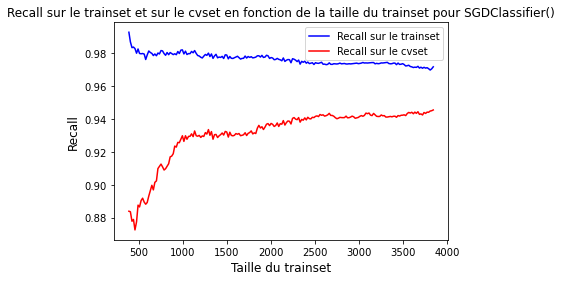

In [10]:
model = SGDClassifier() 
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "recall", train_sizes, n_jobs)

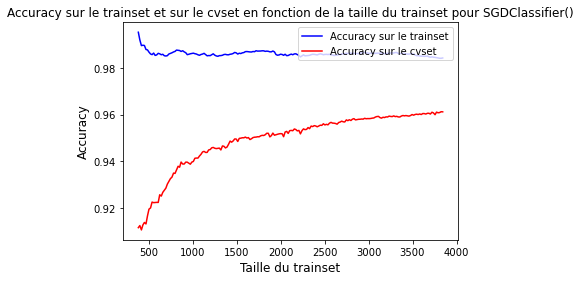

In [11]:
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "accuracy", train_sizes, n_jobs)

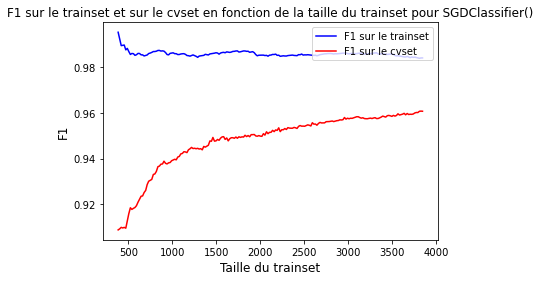

In [12]:
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "f1", train_sizes, n_jobs)

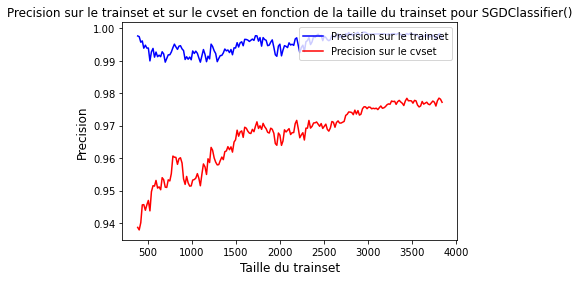

In [13]:
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "precision", train_sizes, n_jobs)

In [144]:
# entrainement du modele
# model = MultinomialNB()
model = SGDClassifier()
model.fit(X_train_tfidf, y_train)

SGDClassifier()

In [145]:
# test du modele
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print(y_pred)
print(X_test.shape)
print(X_test_tfidf.shape)

[1 1 0 ... 1 0 0]
(2014,)
(2014, 9777)


C:\Users\eupho\AppData\Local\Temp/ipykernel_22248/2510564835.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels([false_label, true_label], Fontsize=font_size + 3)
C:\Users\eupho\AppData\Local\Temp/ipykernel_22248/2510564835.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_yticklabels([false_label, true_label], Fontsize=font_size + 3)


Text(69.0, 0.5, 'Catégories réelles')

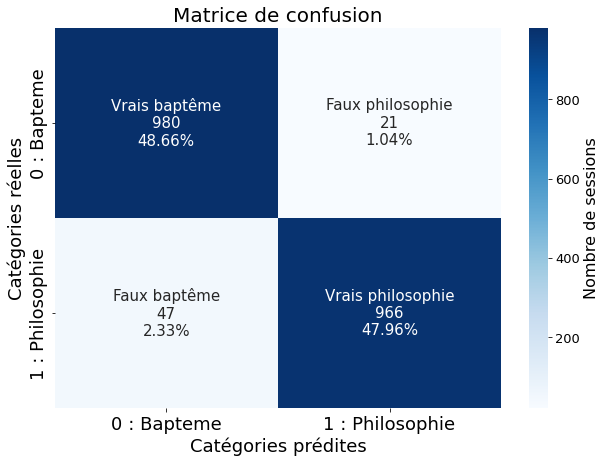

In [135]:
# Matrice de confusion
false_label = "0 : Bapteme"
true_label = "1 : Philosophie"
confusion_matrix_var = confusion_matrix(y_test, y_pred, labels=model.classes_)
group_names = ["Vrais baptême", "Faux philosophie", "Faux baptême", "Vrais philosophie"]
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix_var.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_var.flatten()/np.sum(confusion_matrix_var)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
font_size = 15 #19
plt.rcParams["figure.figsize"] = (10, 7) #taille du graphique, taille du plot
ax = sb.heatmap(confusion_matrix_var, 
                annot=labels, fmt="", cmap='Blues',
                annot_kws={"size": font_size}, 
                cbar_kws={'label': 'Nombre de sessions'})
ax.set_xticklabels([false_label, true_label], Fontsize=font_size + 3)
ax.set_yticklabels([false_label, true_label], Fontsize=font_size + 3)
ax.figure.axes[-1].yaxis.label.set_size(font_size + 1)
ax.figure.axes[-1].tick_params(labelsize=font_size - 2) 
plt.title("Matrice de confusion", fontsize = font_size + 5)
# xlabel = 'Catégories prédites\n\n Exactitude (bien classés) = {:0.2f} % ; Inexactitude (mal classés) = {:0.2f} %\n Précision (bonnes prédictions de robots / qualité) = {:0.2f} %\n Rappel (nombre de robots détectés / quantité) = {:0.2f} %\n F1 (synthèse de précision + rappel) = {:0.2f} %'.format(accuracy, (100 - accuracy), precision, recall, f1_score)
plt.xlabel("Catégories prédites", fontsize=font_size + 3)
plt.ylabel("Catégories réelles", fontsize=font_size + 3)

In [136]:
# Metriques
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1001
           1       0.98      0.95      0.97      1013

    accuracy                           0.97      2014
   macro avg       0.97      0.97      0.97      2014
weighted avg       0.97      0.97      0.97      2014



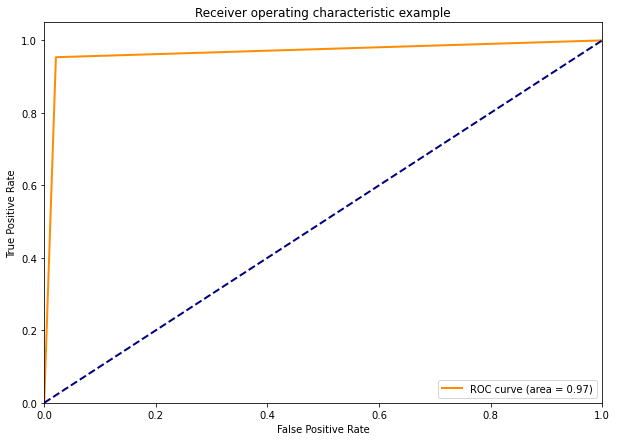

In [137]:
# Courbe ROC et AUC
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# On affiche les documents a propos desquels le modele s'est trompe
corpus_test = pd.DataFrame({"message": corpus.iloc[indices_test].message, "truth":y_test, "pred":y_pred})
corpus_test_errors = corpus_test.query("truth != pred")
print(corpus_test.shape)
print(corpus_test_errors.shape)
# corpus_test_errors = corpus_test_errors[["truth", "pred", "message_preprocessed"]]
corpus_test_errors = corpus_test_errors[["truth", "pred", "message"]]
# corpus_test_errors

In [155]:
pd.set_option('display.expand_frame_repr', False)
corpus_test_errors.to_csv("data/output/prediction_errors.csv", index=False)
erreurs_faux_philosophie = corpus_test_errors[corpus_test_errors["pred"] == 1]
erreurs_faux_philosophie.to_csv("data/output/errors_false_philosophy.csv", index=False, encoding = 'utf-8-sig')
erreurs_faux_philosophie

c:\Users\eupho\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,truth,pred,message
3021,0,1,Etienne Omnès sur 6 janvier 2020 à 15 h 42 min
80,0,1,"Blague à part, il faut que j’étudie cela plus en profondeur 😉"
2885,0,1,"Le débat autour de la transsubstantation ? Le plus ecclésiologique de tous : il ne s’agissait pas tant de savoir si le pain était la chair de Jésus que de **savoir si l’Église était médiatrice entre l’homme et Dieu** : si le prêtre a le pouvoir de changer le pain et le vin en corps et sang du Christ, alors la grâce de Dieu (qui est toute entière contenue dans le Christ) se retrouve à nouveau dans les mains de la prêtrise romaine."
50,0,1,"Pour chaque siècle, je mettrai donc les ressources (les livres) dans cet ordre."
5243,0,1,Il reste donc 2 seules possibilités pour quelqu’un qui veut rester intellectuellement cohérent :
...,...,...,...
1532,0,1,Etienne Omnès sur 11 janvier 2019 à 9 h 30 min
1361,0,1,"Traduire _épérôtèma_ par engagement implique d’adopter un sens de ce mot qui n’est pas attesté avant le IIe siècle2. Avant donc de faire ce choix, il faut se demander s’il n’est pas possible de prendre ce mot dans son sens habituel : la demande, l’interrogation voire l’interrogatoire, la question posée. C’est le sens usuel du mot tant dans la littérature ( _cf_. par ex. Thucydide3 ou le manuscrit _aleph_ de Sir. 36.34), que dans l’épigraphie5."
4458,0,1,"Là-dessus, nous sommes plutôt d’accord. Mais prenons un peu de recul avant d’en tirer des conclusions hâtives."
4393,0,1,* ![TORTAROLO](https://secure.gravatar.com/avatar/321bad9d30f6570f83bdf0a42e944fb7?s=80&d=mm&r=g)


In [152]:
erreurs_faux_bapteme = corpus_test_errors[corpus_test_errors["pred"] == 0]
erreurs_faux_bapteme.to_csv("data/output/errors_false_baptism.csv", index=False, encoding = 'utf-8-sig')
erreurs_faux_bapteme

,truth,pred,message
5883,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *
5649,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *
5468,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *
1181,1,0,"Il nous donne de tourner nos cœurs vers Dieu. « C’est gratuitement qu’ils sont\njustifiés par sa grâce, au moyen de la rédemption qui est en Jésus–Christ.\nC’est lui que Dieu s’est proposé de constituer en expiation, au moyen de la\nfoi, par son sang, pour montrer sa justice » – Romains 3.24"
5261,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *
...,...,...,...
690,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *
5072,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *
507,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *
5386,1,0,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont\nindiqués avec *


In [27]:
print(X_train_tfidf)
X_train_tfidf

  (0, 10537)	0.1633796530792109
  (0, 9621)	0.16311183154213169
  (0, 6435)	0.1863294158248605
  (0, 1217)	0.20225278534533037
  (0, 899)	0.16364960867493525
  (0, 2875)	0.1982623846690439
  (0, 8694)	0.20141621819938454
  (0, 3188)	0.1633796530792109
  (0, 4043)	0.15549858464531688
  (0, 2871)	0.20225278534533037
  (0, 2370)	0.302969034023444
  (0, 10839)	0.1658903754472704
  (0, 9932)	0.20141621819938454
  (0, 10142)	0.23542986649050418
  (0, 4278)	0.1658903754472704
  (0, 7443)	0.09624627443210154
  (0, 1187)	0.11016897123390608
  (0, 8159)	0.1325522042436035
  (0, 1652)	0.19346321058538868
  (0, 1532)	0.09870571208225545
  (0, 3975)	0.3875293898720343
  (0, 7176)	0.15702395311287512
  (0, 551)	0.20225278534533037
  (0, 7337)	0.3326323467475601
  (0, 2758)	0.13148209568170482
  :	:
  (5757, 6354)	0.23637652912131488
  (5757, 471)	0.21866570713650957
  (5757, 3394)	0.20870692582331513
  (5757, 7145)	0.23933253771548715
  (5757, 3582)	0.22646943485964777
  (5757, 9164)	0.1695026917244

<5759x11169 sparse matrix of type '<class 'numpy.float64'>'
	with 133628 stored elements in Compressed Sparse Row format>

In [22]:
print("X_train_tfidf.shape =", X_train_tfidf.shape)
print("X_train_tfidf.data.shape =", X_train_tfidf.data.shape)
print("tfidf_vectorizer.idf_.shape =", tfidf_vectorizer.idf_.shape)

X_train_tfidf.shape = (5759, 11169)
X_train_tfidf.data.shape = (133628,)
tfidf_vectorizer.idf_.shape = (11169,)


In [92]:
# on affiche les poids des mots tfidf
idf = tfidf_vectorizer.idf_
scores_tfidf = pd.DataFrame({"words":tfidf_vectorizer.get_feature_names(), "idf":idf})
scores_tfidf = scores_tfidf.sort_values("idf", ascending=False)
scores_tfidf

c:\Users\eupho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,words,idf
0,aaaayaajpgpadqthechildofth...,8.965546
5824,lexpérience,8.965546
5857,lillback,8.965546
5852,ligament,8.965546
5844,licence,8.965546
5841,libérateur,8.965546
5840,libéralité,8.965546
5836,librement,8.965546
5834,liberum,8.965546
5831,liberalisme,8.965546


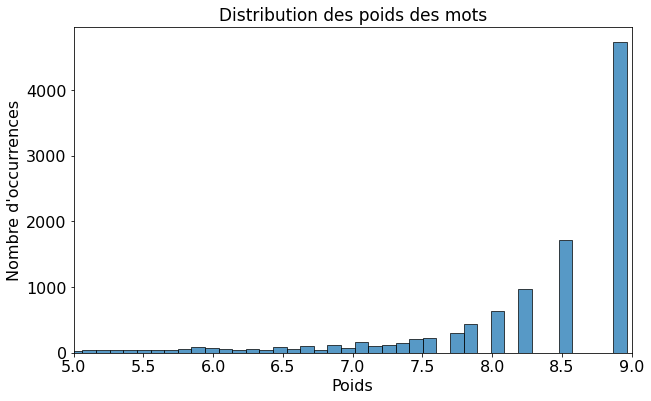

In [101]:
# Distribution des poids des mots (calcules avec sklearn)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution.png")
path = path.as_posix()

sb.histplot(data=scores_tfidf, x="idf")
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids des mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(5, 9)
plt.savefig(path)
plt.show()

In [17]:
# Calcul manuel des poids
print("X_train_tfidf.shape =", X_train_tfidf.shape)
words_weights = X_train_tfidf.sum(axis=0)
print("words_weights.shape =", words_weights.shape)
print(words_weights)
print(words_weights.shape)

X_train_tfidf.shape = (5759, 11195)
words_weights.shape = (1, 11195)
[[0.28800143 0.37253389 1.02558937 ... 0.12627303 0.22995188 0.68985563]]
(1, 11195)


In [18]:
words_weights = np.ravel(words_weights)
print(words_weights)
print(words_weights.shape)

[0.28800143 0.37253389 1.02558937 ... 0.12627303 0.22995188 0.68985563]
(11195,)


In [33]:
# words_weights[:10]
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.unique(words_weights).shape
np.max(words_weights)
np.min(words_weights)

0.03308810017497847

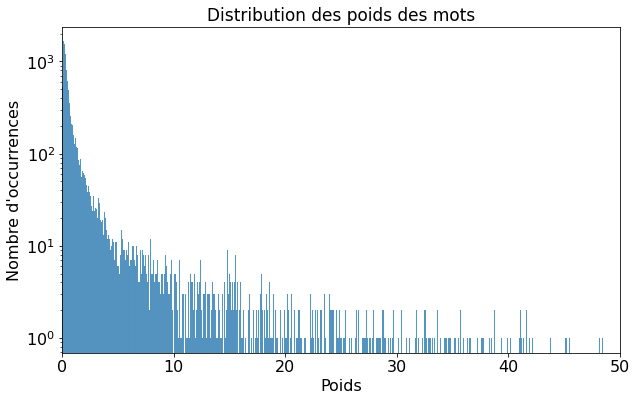

In [36]:
# Distribution des poids des mots (calcules avec a la main)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution_manuel.png")
path = path.as_posix()

# sb.histplot(words_weights[:100000])
sb.histplot(words_weights)
plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids des mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 50)
plt.savefig(path)
plt.show()